### Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()

### Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [2]:
import pandas as pd

data = pd.DataFrame([x[0:2] for x in iris.data], columns=['sepal_length','sepal_width'])
target = iris.target

### Разделите данные на выборку для обучения и тестирования

In [3]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.25)

### Постройте модель LDA

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(data_train, target_train)

LinearDiscriminantAnalysis()

### Визуализируйте предсказания для тестовой выборки и центры классов

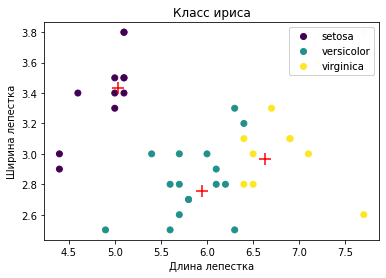

In [5]:
import matplotlib.pyplot as plt

predict = lda.predict(data_test)

fig, ax = plt.subplots()
scatter = ax.scatter(data_test['sepal_length'], data_test['sepal_width'], c=predict)
legend = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="upper right")
ax.add_artist(legend)
plt.title("Класс ириса")
plt.xlabel("Длина лепестка")
plt.ylabel("Ширина лепестка")
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='+')
plt.show()

### Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

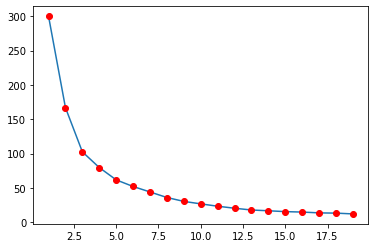

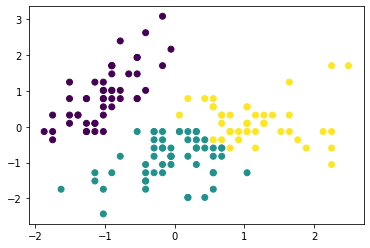

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

clusters = range(1, 20)
inertia = []
for n in clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit_predict(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(clusters, inertia)   
plt.plot(clusters, inertia, 'ro')    
plt.show()    

kmeans = KMeans(n_clusters=3, random_state=3)
clusters = kmeans.fit_predict(data_scaled)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters)
plt.show()